In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cp = pd.read_csv(r"F:\carreer\car_price.csv")

In [3]:
cp.shape

(205, 26)

In [4]:
cp.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [5]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
# here question marks are their in the data therefore it is consider as the null
cp = cp.replace({"?":np.nan})  # running replace function on entire data frame
        # so after this code the null which not showing before will so all the null values in the data
        # we already know how to handle the null

In [7]:
cp.isnull().sum()[cp.isnull().sum() > 0] # check the nulls only function

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [8]:
# here we to do is astype('float')
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [9]:
# So converting it in float by using astype for all the nulls
cp.normalized_losses = cp.normalized_losses.astype('float')
cp.bore = cp.bore.astype('float')
cp.stroke = cp.stroke.astype('float')
cp.horsepower = cp.horsepower.astype('float')
cp.peak_rpm = cp.peak_rpm.astype('float')
cp.price = cp.price.astype('float')

In [10]:
# when target variable is having the null then remember you give zero
# beacause if will make assumption here then what is the use of model buiding so it will be kept zero(0)

In [11]:
# converting null using the fill na
cp.normalized_losses = cp.normalized_losses.fillna(cp.normalized_losses.mean())
cp.bore = cp.bore.fillna(cp.bore.mean())
cp.stroke = cp.stroke.fillna(cp.stroke.mean())
cp.horsepower = cp.horsepower.fillna(cp.horsepower.mean())
cp.peak_rpm = cp.peak_rpm.fillna(cp.peak_rpm.mean())
#cp.price = cp.price.fillna(0) # when target variable is having the null then remember you give zero.
cp.num_of_doors = cp.num_of_doors.fillna('four')


In [12]:
cp.shape

(205, 26)

In [13]:
cp = cp.dropna()

In [14]:
cp.shape # successfull null value deleted from the target variable

(201, 26)

In [15]:
cp.head() 

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
# converting the non numeric to numeric
le = LabelEncoder()

In [17]:
# conveting numeric
cp[cp.select_dtypes(include=['object']).columns]= cp[cp.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [18]:
cp.head() # successfully converted the data from non numeric to numeric 

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,1,2,2,0,94.5,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,1,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,1,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [51]:
cp = df1 # after finding the outlier putting this line and rerunning the model again 

In [94]:
cp.dtypes[cp.dtypes=='object'] # empty list for rerunning the model

Series([], dtype: object)

In [95]:
cp = cp.loc[:,l2] # rerunning the model significant variables

In [96]:
cp_train , cp_test = train_test_split(cp , test_size = .2) # sampling the data for model building

In [97]:
cp_train.shape

(149, 19)

In [98]:
cp_test.shape

(38, 19)

In [99]:
cp_train_x = cp_train.iloc[: , 0:-1] # indepedent variable
cp_train_y = cp_train.iloc[: , -1] # target variable 

In [100]:
cp_test_x = cp_test.iloc[: , 0:-1]
cp_test_y = cp_test.iloc[: , -1]

In [101]:
# import linearregressoion which is already imported at top
linreg_cp = LinearRegression()

In [102]:
linreg_cp.fit(cp_train_x , cp_train_y) # model had been created

LinearRegression()

In [103]:
linreg_cp.score(cp_train_x,cp_train_y) # Rsquare

0.9578027567074762

In [104]:
Rsquare = linreg_cp.score(cp_train_x , cp_train_y)
Rsquare

0.9578027567074762

In [105]:
len(cp_train_x.columns)

18

In [106]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]

In [107]:
AdjRsquare = 1 - (1 - Rsquare) * (N - 1)/( N - K - 1)
AdjRsquare

0.9519600614823575

In [108]:
linreg_cp.coef_ # to  find the coefficient # value of B1, B2 value slope M

array([ 3.65649559e-01,  6.37867023e-04, -2.86222190e+00, -8.40908593e-01,
       -1.19666239e+00,  6.67024516e-01, -8.73434518e-02,  4.21451193e-02,
        8.42687653e-02, -6.29736274e-03, -2.60256706e-03,  3.57497711e-03,
        9.08172723e-03, -3.50275211e-01, -2.32658631e-01,  1.13837219e-02,
       -4.00713105e-04,  9.88378388e-01])

In [109]:
linreg_cp.intercept_ # to find the intercept  # Bo beta not

14.396334738879375

In [110]:
pred_train = linreg_cp.predict(cp_train_x)
pred_test = linreg_cp.predict(cp_test_x)

In [111]:
err_test = cp_test_y - pred_test # error=actual - predicted

In [112]:
err_train=cp_train_y - pred_train

In [113]:
np.mean(err_train) # (Mean Square Error) mean of error should always be close to zero

-1.0491235024645775e-15

In [114]:
mse = np.mean(np.square(err_test)) # MSE
mse

1.304918159218646

In [115]:
rmse  = np.sqrt(mse) # it is nothing but the square root of  the rmse # root mean square error 
rmse

1.1423301445810865

In [116]:
mape=np.mean(np.abs(err_test *100/cp_test_y))
mape # 100-11.31=00 88 % model accurary mean abs persentile error
#error*100/actual

2.6270457244017775

In [117]:
pred_train_cp = linreg_cp.predict(cp_train_x)
pred_test_cp = linreg_cp.predict(cp_test_x)

In [118]:
pred_train_cp = linreg_cp.predict(cp_train_x)
pred_test_cp = linreg_cp.predict(cp_test_x)

In [119]:
err_train = cp_train_y - pred_train_cp
err_test = cp_test_y - pred_test_cp

# Visualization

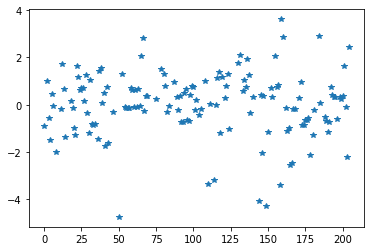

In [120]:
plt.plot(err_train , "*") # ploting the scatter plot 
                        # to check the pattern

(array([ 1.,  2.,  0.,  3.,  0.,  2.,  4.,  4., 10., 17., 17., 19., 27.,
        18., 11.,  5.,  4.,  1.,  3.,  1.]),
 array([-4.76161376, -4.34242655, -3.92323934, -3.50405213, -3.08486492,
        -2.66567771, -2.24649049, -1.82730328, -1.40811607, -0.98892886,
        -0.56974165, -0.15055444,  0.26863277,  0.68781998,  1.10700719,
         1.5261944 ,  1.94538161,  2.36456882,  2.78375603,  3.20294324,
         3.62213045]),
 <BarContainer object of 20 artists>)

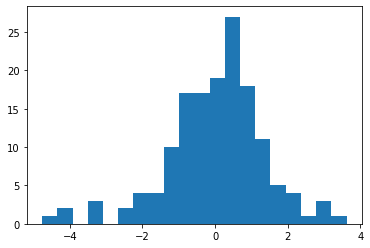

In [121]:
plt.hist(err_train, bins=20) # checking the histogram in the model 
                            # check if normally data or not

(array([ 1.,  2.,  0.,  3.,  0.,  2.,  4.,  4., 10., 17., 17., 19., 27.,
        18., 11.,  5.,  4.,  1.,  3.,  1.]),
 array([-4.76161376, -4.34242655, -3.92323934, -3.50405213, -3.08486492,
        -2.66567771, -2.24649049, -1.82730328, -1.40811607, -0.98892886,
        -0.56974165, -0.15055444,  0.26863277,  0.68781998,  1.10700719,
         1.5261944 ,  1.94538161,  2.36456882,  2.78375603,  3.20294324,
         3.62213045]),
 <BarContainer object of 20 artists>)

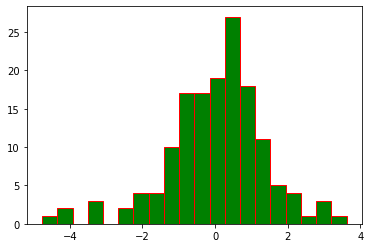

In [122]:
plt.hist(err_train , color = "g" , bins = 20 , edgecolor = "r") # check the if it is normally

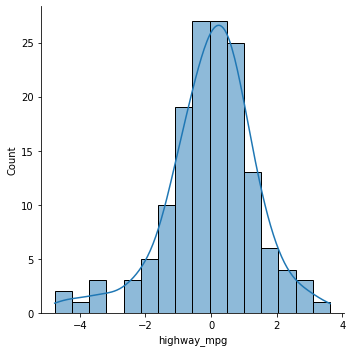

In [123]:
sns.displot(err_train,kde=True) # we peakness=3 lepotokutic

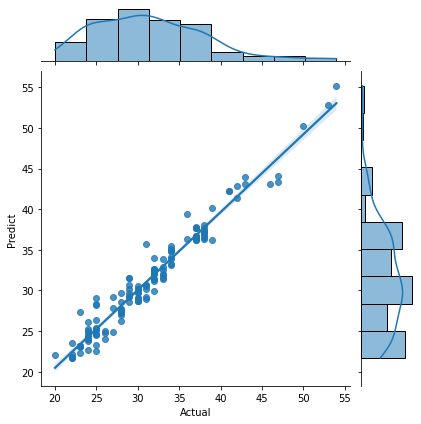

In [124]:
pred_actual_df = pd.DataFrame()
pred_actual_df['Actual'] = cp_train_y
pred_actual_df['Predict'] = pred_train_cp
sns.jointplot(x = 'Actual' , y = 'Predict',data = pred_actual_df, kind= 'reg')

In [49]:
# code to remove the outlier
def remove_outlier(df,col,k=2):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    # df1 is A final dataframe (DF) where the outlier has been removed 
    print("Number of outlier removed ==>" , df.shape[0] - df1.shape[0])

In [50]:
remove_outlier(cp,'price', k=2)

(187, 26)
Number of outlier removed ==> 14


In [83]:
# to build relation between x wrt to y 
l1 = list(cp_train_x.columns)

In [84]:
corr_list = []
for col in l1:
    corr_list.append(cp.price.corr(cp[col]))

In [85]:
df1 = pd.DataFrame()

In [86]:
df1["Name_of_col"] = l1
df1["Correlation"] = corr_list

In [87]:
df1[(df1.Correlation >.4) | ( df1.Correlation < -.4 )]

,Name_of_col,Correlation
3,make,0.416772
6,wheel_base,0.574594
8,drive_wheels,0.667972
10,length,0.731624
11,width,0.790317
13,curb_weight,0.854573
16,engine_size,0.750113
17,fuel_system,0.591285
18,bore,0.504435
21,horsepower,0.722010


In [88]:
df2 = df1[(df1.Correlation > .1) | (df1.Correlation < -.1)] # to give value to 

In [89]:
l2 = list(df2.Name_of_col)

In [90]:
l2

['symboling',
 'normalized_losses',
 'Fuel_type',
 'make',
 'num_of_doors',
 'wheel_base',
 'drive_wheels',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'fuel_system',
 'bore',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [125]:
len(l2)

19